In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Data preparation

In [3]:
historicalsale=pd.read_csv("E:\工作\百威\(Replace)Historical Sales Volume 2016.1-2019.11.csv")
masterdata=pd.read_csv("E:\工作\百威\(Replace)Product Master Data.csv")
commercialplanning=pd.read_csv("E:\工作\百威\(Replace)Commercial Planning.csv")

In [110]:
saleseries=pd.read_csv("C:/Users/mings/BUD/rearranged_sale.csv")
calendar=pd.read_csv("E:\工作\百威\calendar.csv")

In [5]:
historicalsale['Date']=historicalsale['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [6]:
historicalsale.set_index('Date',inplace=True)

,Year,Month,YM,SalesRegion,SKU Code,VolumeHL
Date,,,,,,
2016-01-02,2016,1,201601,Heilongjiang,1,2020
2016-01-02,2016,1,201601,Heilongjiang,4,79
2016-01-02,2016,1,201601,Heilongjiang,9,138
2016-01-02,2016,1,201601,Heilongjiang,11,32
2016-01-02,2016,1,201601,Heilongjiang,13,95
...,...,...,...,...,...,...
2019-11-30,2019,11,201911,Jilin,63,1056
2019-11-30,2019,11,201911,Jilin,64,1831
2019-11-30,2019,11,201911,Jilin,66,43


In [907]:
historicalsale['Day']=historicalsale.index.map(lambda x: x.day)

In [908]:
historicalsale

,Year,Month,YM,SalesRegion,SKU Code,VolumeHL,Day
Date,,,,,,,
2016-01-02,2016,1,201601,Heilongjiang,1,2020,2
2016-01-02,2016,1,201601,Heilongjiang,4,79,2
2016-01-02,2016,1,201601,Heilongjiang,9,138,2
2016-01-02,2016,1,201601,Heilongjiang,11,32,2
2016-01-02,2016,1,201601,Heilongjiang,13,95,2
...,...,...,...,...,...,...,...
2019-11-30,2019,11,201911,Jilin,63,1056,30
2019-11-30,2019,11,201911,Jilin,64,1831,30
2019-11-30,2019,11,201911,Jilin,66,43,30


In [952]:
# create new historical sale which will contain all the  zero
from datetime import datetime
saleseries['Unnamed: 0']=saleseries['Unnamed: 0'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
saleseries

,Unnamed: 0,Heilongjiang_1,Heilongjiang_4,Heilongjiang_9,Heilongjiang_11,Heilongjiang_13,Heilongjiang_14,Heilongjiang_15,Heilongjiang_16,Heilongjiang_17,...,Jilin_64,Jilin_61,Jilin_66,Jilin_68,Jilin_65,Jilin_69,Jilin_62,Jilin_63,Jilin_45,Jilin_2
0,2016-01-02,2020.0,79.0,138.0,32.0,95.0,60.0,484.0,1771.0,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03,1544.0,158.0,NaN,NaN,48.0,989.0,NaN,2800.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,1992.0,32.0,69.0,NaN,158.0,595.0,230.0,1784.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-05,2592.0,NaN,NaN,NaN,285.0,535.0,NaN,2085.0,115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-06,2214.0,285.0,121.0,48.0,206.0,922.0,132.0,2372.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,2019-11-26,890.0,200.0,NaN,NaN,NaN,267.0,230.0,321.0,323.0,...,468.0,768.0,130.0,2125.0,NaN,380.0,160.0,869.0,NaN,NaN
1425,2019-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,795.0,...,775.0,829.0,60.0,2048.0,NaN,1011.0,468.0,120.0,NaN,NaN
1426,2019-11-28,NaN,177.0,NaN,NaN,111.0,NaN,69.0,722.0,536.0,...,1657.0,1196.0,NaN,1244.0,NaN,60.0,615.0,347.0,NaN,NaN
1427,2019-11-29,613.0,255.0,NaN,NaN,NaN,NaN,NaN,180.0,323.0,...,575.0,1296.0,NaN,2117.0,NaN,NaN,715.0,187.0,NaN,NaN


In [953]:
def seriestrans(saleseries):
    niters=saleseries.shape[1]
    clen=saleseries.shape[0]
    counts=0
    for i in range(1,niters):
        region=re.match('(.*)_(.*)',saleseries.columns[i]).group(1)
        sku=re.match('(.*)_(.*)',saleseries.columns[i]).group(2)
        for j in range(clen):
            hissaleall.loc[counts,'Year']=saleseries.iloc[j,0].year
            hissaleall.loc[counts,'Month']=saleseries.iloc[j,0].month
            hissaleall.loc[counts,'Day']=saleseries.iloc[j,0].year
            hissaleall.loc[counts,'Date']=saleseries.iloc[j,0]
            hissaleall.loc[counts,'SalesRegion']=region
            hissaleall.loc[counts,'SKU Code']=sku
            hissaleall.loc[counts,'VolumeHL']=saleseries.iloc[j,i]
            counts+=1

In [954]:
hissaleall=pd.DataFrame(columns=['Date','Year','Month','Day','SalesRegion','SKU Code','VolumeHL'],index=range(130000))

In [955]:
seriestrans(saleseries)

In [956]:
hissaleall

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL
0,2016-01-02 00:00:00,2016,1,2016,Heilongjiang,1,2020
1,2016-01-03 00:00:00,2016,1,2016,Heilongjiang,1,1544
2,2016-01-04 00:00:00,2016,1,2016,Heilongjiang,1,1992
3,2016-01-05 00:00:00,2016,1,2016,Heilongjiang,1,2592
4,2016-01-06 00:00:00,2016,1,2016,Heilongjiang,1,2214
...,...,...,...,...,...,...,...
129995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [962]:
hissaleall.dropna(how='all',inplace=True)

In [961]:
hissaleall.set_index('Date',inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [964]:
hissaleall.fillna(0,inplace=True)

In [970]:
hissaleall['SKU Code']=hissaleall['SKU Code'].astype(int)

In [978]:
hissaleall['SalesRegion']=hissaleall['SalesRegion'].astype(str)

In [979]:
hissaleall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125752 entries, 2016-01-02 to 2019-11-30
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         125752 non-null  int64  
 1   Month        125752 non-null  int64  
 2   Day          125752 non-null  int64  
 3   SalesRegion  125752 non-null  object 
 4   SKU Code     125752 non-null  int32  
 5   VolumeHL     125752 non-null  float64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 6.2+ MB


In [9]:
# load temperature
Htem=pd.read_csv("E:\工作\百威\Data\HWeather_t.csv")
Jtem=pd.read_csv("E:\工作\百威\Data\JWeather_t.csv")
#Htem.info()
Htem

,Date,Temp_max,Temp_min
0,2016-01-01,-5℃,-20℃
1,2016-01-02,-13℃,-23℃
2,2016-01-03,-12℃,-25℃
3,2016-01-04,-12℃,-21℃
4,2016-01-05,-11℃,-18℃
...,...,...,...
1485,2020-01-27,-4℃,-15℃
1486,2020-01-28,-10℃,-19℃
1487,2020-01-29,-8℃,-22℃
1488,2020-01-30,-11℃,-24℃


In [11]:
import re

In [12]:
Htem['Temp_max']=Htem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_max']=Htem['Temp_max'].astype(int)
Htem['Temp_min']=Htem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Htem['Temp_min']=Htem['Temp_min'].astype(int)

In [13]:
Htem['Date']=Htem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [14]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [15]:
Jtem['Temp_min']=Jtem['Temp_min'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].map(lambda x: re.match('(.*)℃',x)[1])
Jtem['Temp_max']=Jtem['Temp_max'].astype(int)
Jtem['Temp_min']=Jtem['Temp_min'].astype(int)
Jtem['Date']=Jtem['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [16]:
Htem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1490 non-null   datetime64[ns]
 1   Temp_max  1490 non-null   int32         
 2   Temp_min  1490 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 23.4 KB


In [19]:
Htem['SalesRegion']='Heilongjiang'
Jtem['SalesRegion']='Jilin'

In [49]:
Twotemps=Htem.append(Jtem)
Twotemps

,Date,Temp_max,Temp_min,SalesRegion
0,2016-01-01,-5,-20,Heilongjiang
1,2016-01-02,-13,-23,Heilongjiang
2,2016-01-03,-12,-25,Heilongjiang
3,2016-01-04,-12,-21,Heilongjiang
4,2016-01-05,-11,-18,Heilongjiang
...,...,...,...,...
1485,2020-01-27,1,-11,Jilin
1486,2020-01-28,-4,-15,Jilin
1487,2020-01-29,-9,-20,Jilin
1488,2020-01-30,-9,-21,Jilin


In [111]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1551 non-null   object 
 1   weekday       1551 non-null   object 
 2   wday          168 non-null    float64
 3   month         170 non-null    float64
 4   year          1551 non-null   int64  
 5   event_name_1  111 non-null    object 
 6   event_type_1  111 non-null    object 
 7   holiday       118 non-null    float64
 8   work          31 non-null     float64
 9   event_name_2  68 non-null     object 
 10  event_type_2  68 non-null     object 
dtypes: float64(4), int64(1), object(6)
memory usage: 133.4+ KB


In [112]:
calendar['date']=calendar['date'].astype(str)
calendar['Date']=calendar['date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))

In [692]:
def labelevent(leadtimelist,endtimelist,markerlist,temdf):
    for i in range(len(leadtimelist)):
        tarevent=markerlist[i]
        print(tarevent)
        tarlead=leadtimelist[i]
        tarend=endtimelist[i]
        #print(1)
        if tarevent in ['National','Cultural']:
            #print(3)
            for m in range(len(temdf)):
                #print(temdf.loc[m,'event1'])
                if temdf.loc[m,'event_type_1']==tarevent:
                    mb=np.max([0,m-tarlead])
                    mf=np.max([0,m-tarend])
                    temdf.loc[mb:mf,tarevent]=1
                    #print(2)
        else:
            for m in range(len(temdf)):
                if temdf.loc[m,'event_type_2']==tarevent:
                    mb=np.max([0,m-tarlead])
                    mf=np.max([0,m-tarend])
                    temdf.loc[mb:mf,tarevent]=1
    return temdf[['National','Cultural','Sporting','Date']]

In [114]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [115]:
calendar[calendar['event_type_2']=='COVID19']['event_type_2']=np.nan

C:\Users\mings\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
calendar['event_type_2'].value_counts()

Sporting    65
COVID19      3
Name: event_type_2, dtype: int64

In [117]:
calendar['event_type_1'].value_counts()

National    64
Cultural    47
Name: event_type_1, dtype: int64

In [118]:
calendardroped=calendar.drop(columns=['event_name_1','holiday','work','event_name_1','weekday','wday','month','year','event_name_2'])

In [119]:
calendardroped['National']=0
calendardroped['Cultural']=0
calendardroped['Sporting']=0

In [120]:
calendardroped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1551 non-null   object        
 1   event_type_1  111 non-null    object        
 2   event_type_2  68 non-null     object        
 3   Date          1551 non-null   datetime64[ns]
 4   National      1551 non-null   int64         
 5   Cultural      1551 non-null   int64         
 6   Sporting      1551 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 84.9+ KB


In [547]:
HECPI=pd.read_csv("E:\工作\百威\Data\HCPI_E_t.csv")
JECPI=pd.read_csv("E:\工作\百威\Data\JCPI_E_t.csv")

In [548]:
# a function to formalize  CPI data's format
def transcpi(tarset,region):
    try:
        tarset['Date']=tarset['Date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d'))
    except:
        print('Already Datetime')
    tarset['Year']=tarset['Date'].map(lambda x: x.year)
    tarset['Month']=tarset['Date'].map(lambda x: x.month)
    tarset['SalesRegion']=region
    tarset.drop(columns=['Date'],inplace=True)
    return tarset

In [549]:
HECPIT=transcpi(HECPI,'Heilongjiang')
JECPIT=transcpi(JECPI,'Jilin')
CPIT=HECPIT.append(JECPIT)

In [556]:
CPITcols=[]
for x in CPIT.columns:
    if x not in ['Year','Month', 'SalesRegion']:
        CPITcols.append(x)
CPIT[CPITcols]=CPIT[CPITcols]-100
CPIT

,CPI_rice,CPI_meat,CPI_egg,CPI_fish,CPI_veg,CPI_fruit,Year,Month,SalesRegion
0,1.5,17.1,-4.3,2.5,15.6,-4.9,2016,1,Heilongjiang
1,0.9,21.4,-3.5,2.9,17.3,-5.9,2016,2,Heilongjiang
2,0.5,21.1,-3.6,0.9,25.3,-9.3,2016,3,Heilongjiang
3,0.2,23.4,-0.3,-0.2,14.4,-5.2,2016,4,Heilongjiang
4,0.7,22.1,2.3,0.9,-1.0,-6.6,2016,5,Heilongjiang
...,...,...,...,...,...,...,...,...,...
48,0.2,88.5,0.0,4.9,28.1,0.4,2020,1,Jilin
49,0.2,81.2,-0.3,6.1,14.5,-3.1,2020,2,Jilin
50,0.0,73.9,-0.7,4.4,5.6,-3.5,2020,3,Jilin
51,0.5,60.1,-4.1,5.4,1.9,-7.4,2020,4,Jilin


In [693]:
# a function for exponential smoothing and shift
def doews(tarset, alpha, periods):
    tarset=tarset.copy()
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarset[x+'_es_'+str(periods)]=tarset[x].ewm(alpha=alpha, adjust=False).mean()
            tarset[x+'_es_'+str(periods)]=tarset[x+'_es_'+str(periods)].shift(periods=periods)
            tarset=tarset.drop(columns=x)
    return tarset

In [694]:
CPI_es_1=doews(CPIT, 0.7,1)
CPI_es_1

,Year,Month,SalesRegion,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016,1,Heilongjiang,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2,Heilongjiang,1.500000,17.100000,-4.300000,2.500000,15.600000,-4.900000
2,2016,3,Heilongjiang,1.080000,20.110000,-3.740000,2.780000,16.790000,-5.600000
3,2016,4,Heilongjiang,0.674000,20.803000,-3.642000,1.464000,22.747000,-8.190000
4,2016,5,Heilongjiang,0.342200,22.620900,-1.302600,0.299200,16.904100,-6.097000
...,...,...,...,...,...,...,...,...,...
48,2020,1,Jilin,0.340782,74.100404,5.164402,2.135567,14.234612,-2.172754
49,2020,2,Jilin,0.242234,84.180121,1.549321,4.070670,23.940383,-0.371826
50,2020,3,Jilin,0.212670,82.094036,0.254796,5.491201,17.332115,-2.281548
51,2020,4,Jilin,0.063801,76.358211,-0.413561,4.727360,9.119635,-3.134464


In [1008]:
#  a function for finding coresponding historical data

# 后面可能需要考虑动态历史数据寻找
def findhistory(tarset):
    tarcol=[]
    for x in tarset.columns:
        if x not in ['Year','Month', 'SalesRegion','Date']:
            tarcol.append(x)
#     print(tarcol)
    tarcolfull=tarcol.copy().extend(['Month', 'SalesRegion'])
#     print(tarcol)
    tarset=tarset.copy()
    tarhist=pd.DataFrame(columns=tarcolfull,index=range(24))
    if 'Month' in tarset.columns:
        targrouped=tarset.groupby(['Month','SalesRegion'])
    elif 'Date' in tarset.columns:
        tarset['Month']=tarset['Date'].apply(lambda x: x.month)
        targrouped=tarset.groupby(['Month','SalesRegion'])
    else:
        print('Dont have proper timestamp')
    count=0
    for m in range(1,13):
        for n in ['Heilongjiang','Jilin']:
            tseries=targrouped.get_group((m,n)).mean()
            tarhist.loc[count,'Month']=m
            tarhist.loc[count,'SalesRegion']=n
            for x in tarcol:
#                 print(x)
                tarhist.loc[count,x]=tseries[x]
            count=count+1
#     mapdict={1:2,
#              2:3,
#              3:4,
#              4:5,
#              5:6,
#              6:7,
#              7:8,
#              8:9,
#              9:10,
#             10:11,
#             11:12,
#             12:1}
    tarhist['Month']=tarhist['Month'].apply(lambda x: x-1 if x>1 else x+11)
    tarhist.columns=tarhist.columns.map(lambda x: x+'_hist' if x in tarcol else x)
    return tarhist

In [1009]:
CPIT_hisdata=findhistory(CPIT)

In [1010]:
CPIT_hisdata

,Month,SalesRegion,CPI_rice_hist,CPI_meat_hist,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist
0,12.0,Heilongjiang,1.300,19.360,-0.800,2.340,7.780,1.900
1,12.0,Jilin,0.600,18.140,-0.280,2.700,9.000,3.300
2,1.0,Heilongjiang,1.220,19.920,-0.680,2.160,5.160,1.700
3,1.0,Jilin,0.600,17.860,-0.920,2.780,5.800,2.020
4,2.0,Heilongjiang,1.160,18.360,-1.000,1.960,5.660,1.580
5,2.0,Jilin,0.580,17.040,-1.440,1.900,5.300,1.160
6,3.0,Heilongjiang,1.180,15.860,-0.820,1.660,2.960,1.560
7,3.0,Jilin,0.640,15.620,-0.740,1.860,2.860,2.160
8,4.0,Heilongjiang,1.220,13.380,-1.080,1.820,0.720,2.140
9,4.0,Jilin,0.700,13.840,-0.760,2.560,2.520,2.500


In [1011]:
Temp_hisdata=findhistory(Twotemps)

In [1012]:
Temp_hisdata

,Month,SalesRegion,Temp_max_hist,Temp_min_hist
0,12.0,Heilongjiang,-11.612903,-22.658065
1,12.0,Jilin,-8.264516,-17.767742
2,1.0,Heilongjiang,-6.088496,-17.752212
3,1.0,Jilin,-3.982301,-13.920354
4,2.0,Heilongjiang,4.967742,-6.895161
5,2.0,Jilin,5.846774,-4.298387
6,3.0,Heilongjiang,14.358333,2.108333
7,3.0,Jilin,15.008333,3.833333
8,4.0,Heilongjiang,21.911290,10.104839
9,4.0,Jilin,22.572581,10.870968


In [773]:
sales=historicalsale.copy()
sales=sales.drop(columns=['Month','Year','YM'])
sales

,SalesRegion,SKU Code,VolumeHL
Date,,,
2016-01-02,Heilongjiang,1,2020
2016-01-02,Heilongjiang,4,79
2016-01-02,Heilongjiang,9,138
2016-01-02,Heilongjiang,11,32
2016-01-02,Heilongjiang,13,95
...,...,...,...
2019-11-30,Jilin,63,1056
2019-11-30,Jilin,64,1831
2019-11-30,Jilin,66,43


In [788]:
import datetime
def datarolling(tarset,rperiods,tarcol):
    tarset=tarset.copy()
    for i in range(len(rperiods)):
        tarset[tarcol+'_'+str(rperiods[i])]=tarset[tarcol].rolling(rperiods[i]).mean()
    tarset=tarset.drop(columns='VolumeHL')
    return tarset

In [789]:
saleroll=datarolling(sales,[2,5,8,10,12,14,16,20,30],'VolumeHL')
saleroll.index=saleroll.index.map(lambda x: x+datetime.timedelta(days=1))

In [790]:
saleroll

,SalesRegion,SKU Code,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
Date,,,,,,,,,,,
2016-01-03,Heilongjiang,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,4,1049.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,9,108.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,11,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,Heilongjiang,13,63.5,472.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,Jilin,63,718.5,921.4,1274.250,1430.2,1607.250000,1705.214286,1682.5000,1375.30,1196.200000
2019-12-01,Jilin,64,1443.5,1258.8,1496.625,1220.6,1350.083333,1594.285714,1748.5000,1464.65,1237.633333
2019-12-01,Jilin,66,937.0,1262.2,824.875,1206.8,1348.000000,1511.500000,1609.1875,1455.10,1222.600000


In [909]:
def createdataset(totalset, historicalsale, masterdata, planning, Twotemps ,Temp_hisdata,CPIT,CPIT_hisdata, CPI_es_1,saleroll):
    totalset.index=historicalsale.index
    totalset[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]=historicalsale[['Year','Month','Day','SalesRegion','SKU Code','VolumeHL']]
    totalset['Weekday']=totalset.index.map(lambda x:x.weekday())
    # add temperaature and other time series related features
    # temperature corresponding to date and region
    totalset=pd.merge(totalset,Twotemps,how='left',on=['Date','SalesRegion'])
    # set  event lagging use this function
    callabeled=labelevent([20,20,20],[15,15,15],['National','Cultural','Sporting'],calendardroped)
    totalset=pd.merge(totalset,callabeled,how='left',on=['Date'])
    totalset=pd.merge(totalset,CPIT,how='left',on=['Year','Month','SalesRegion'])
    totalset=pd.merge(totalset,Temp_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPIT_hisdata,how='left',on=['Month','SalesRegion'])
    totalset=pd.merge(totalset,CPI_es_1,how='left',on=['Year','Month','SalesRegion'])
    totalset=pd.merge(totalset,saleroll,how='left',on=['Date','SKU Code','SalesRegion'])
    return totalset

In [1013]:
# totalset=pd.DataFrame(index=range(len(historicalsale)))
totalset=pd.DataFrame(index=range(len(hissaleall)))

#参数说明
# totalset 目标数据集，用来呈现合并后的结构
# historicalsale 原始 历史销售数据集
# masterdata 产品主数据
# commercialplanning 产品商业计划数据 如促销\折扣等情况
# Twotemps 两省原始温度数据
# Temp_hisdata 历史同期温度数据
# CPIT 两省原始居民消费指数
# CPIT_hisdata 历史同期居民消费指数数据\
# saleroll rolling之后的salesvolumne

# totalset=createdataset(totalset, historicalsale, masterdata, commercialplanning,Twotemps ,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1,saleroll)
totalset=createdataset(totalset, hissaleall, masterdata, commercialplanning,Twotemps ,Temp_hisdata,CPIT,CPIT_hisdata,CPI_es_1,saleroll)

National
Cultural
Sporting


In [1014]:
totalset

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,Weekday,Temp_max,Temp_min,...,CPI_fruit_es_1,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
0,2016-01-02,2016,1,2016,Heilongjiang,1,2020.0,5,-13.0,-23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-03,2016,1,2016,Heilongjiang,1,1544.0,6,-12.0,-25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,2016,1,2016,Heilongjiang,1,1992.0,0,-12.0,-21.0,...,NaN,922.0,479.4,365.75,312.4,393.750000,489.285714,568.0000,634.15,522.566667
3,2016-01-05,2016,1,2016,Heilongjiang,1,2592.0,1,-11.0,-18.0,...,NaN,1051.5,659.0,463.75,411.7,431.166667,498.642857,501.4375,444.30,541.800000
4,2016-01-06,2016,1,2016,Heilongjiang,1,2214.0,2,-13.0,-23.0,...,NaN,1367.5,1003.6,1055.25,962.0,969.750000,888.000000,832.4375,814.30,794.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125747,2019-11-26,2019,11,2019,Jilin,2,0.0,1,2.0,-13.0,...,9.069401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125748,2019-11-27,2019,11,2019,Jilin,2,0.0,2,-7.0,-15.0,...,9.069401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125749,2019-11-28,2019,11,2019,Jilin,2,0.0,3,-6.0,-14.0,...,9.069401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125750,2019-11-29,2019,11,2019,Jilin,2,0.0,4,-4.0,-12.0,...,9.069401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1015]:
totalsetdroped=totalset.copy()
totalsetdroped=totalsetdroped.dropna(how='any')

In [913]:
from xgboost import XGBRegressor
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [991]:
totalsetdroped.describe()

,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,Weekday,Temp_max,Temp_min,National,...,CPI_fruit_es_1,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
count,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,...,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000
mean,2017.446518,6.392549,2017.446518,1.560825,34.091166,461.010404,3.079979,12.366903,2.312341,0.543365,...,5.161034,546.347387,546.833265,546.778247,546.691530,546.553571,546.408101,546.321939,546.263075,546.452162
std,1.101826,3.341753,1.101826,0.496291,19.430801,731.931649,1.919118,14.400181,14.470380,0.498121,...,10.904149,501.288549,321.477659,260.924126,235.740989,215.267335,198.505795,184.646444,164.825675,142.893884
min,2016.000000,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000,-24.000000,-35.000000,0.000000,...,-13.093004,0.000000,10.000000,21.375000,56.400000,77.916667,82.071429,102.437500,146.850000,194.666667
25%,2016.000000,4.000000,2016.000000,1.000000,17.000000,0.000000,1.000000,-1.000000,-11.000000,0.000000,...,-1.729081,180.500000,318.600000,361.000000,378.000000,394.166667,406.357143,417.125000,432.000000,445.933333
50%,2017.000000,6.000000,2017.000000,2.000000,33.000000,138.000000,3.000000,16.000000,4.000000,1.000000,...,3.736774,400.500000,489.400000,503.500000,511.100000,517.166667,520.071429,523.750000,526.950000,533.133333
75%,2018.000000,9.000000,2018.000000,2.000000,50.000000,634.000000,5.000000,25.000000,15.000000,1.000000,...,7.905206,770.000000,708.400000,686.500000,676.000000,665.166667,654.500000,647.500000,636.550000,626.833333
max,2019.000000,12.000000,2019.000000,2.000000,69.000000,10811.000000,6.000000,35.000000,26.000000,1.000000,...,46.181503,6506.500000,3490.600000,2802.625000,2536.900000,2455.166667,2439.357143,2412.125000,2092.600000,1620.866667


In [1016]:
def finalpre(tarset):
    tarset.replace({'SalesRegion':{'Heilongjiang':1,'Jilin':2}},inplace=True)
    xcols=[]
    for col in tarset.columns:
        if col not in ['VolumeHL','Date']:
            xcols.append(col)
    return xcols

In [1017]:
xcols=finalpre(totalsetdroped)

In [1018]:
xcols

['Year',
 'Month',
 'Day',
 'SalesRegion',
 'SKU Code',
 'Weekday',
 'Temp_max',
 'Temp_min',
 'National',
 'Cultural',
 'Sporting',
 'CPI_rice',
 'CPI_meat',
 'CPI_egg',
 'CPI_fish',
 'CPI_veg',
 'CPI_fruit',
 'Temp_max_hist',
 'Temp_min_hist',
 'CPI_rice_hist',
 'CPI_meat_hist',
 'CPI_egg_hist',
 'CPI_fish_hist',
 'CPI_veg_hist',
 'CPI_fruit_hist',
 'CPI_rice_es_1',
 'CPI_meat_es_1',
 'CPI_egg_es_1',
 'CPI_fish_es_1',
 'CPI_veg_es_1',
 'CPI_fruit_es_1',
 'VolumeHL_2',
 'VolumeHL_5',
 'VolumeHL_8',
 'VolumeHL_10',
 'VolumeHL_12',
 'VolumeHL_14',
 'VolumeHL_16',
 'VolumeHL_20',
 'VolumeHL_30']

In [808]:
totalsetdroped

,Date,Year,Month,SalesRegion,SKU Code,VolumeHL,Weekday,Temp_max,Temp_min,National,...,CPI_fruit_es_1,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
59,2016-01-03,2016,1,2,27,935,6,-9.0,-17.0,0,...,-13.093004,260.5,200.4,160.000,288.1,417.166667,517.428571,531.2500,552.45,531.066667
60,2016-01-03,2016,1,2,31,1578,6,-9.0,-17.0,0,...,-13.093004,210.0,206.6,191.500,224.6,345.250000,456.785714,482.3750,559.55,473.733333
91,2016-01-04,2016,1,2,1,540,0,-11.0,-18.0,0,...,-13.093004,1273.0,1001.0,907.125,760.3,650.833333,580.142857,690.5625,612.80,512.666667
92,2016-01-04,2016,1,2,4,95,0,-11.0,-18.0,0,...,-13.093004,332.5,866.4,778.625,740.4,653.500000,567.714286,521.5000,609.65,514.233333
93,2016-01-04,2016,1,2,13,63,0,-11.0,-18.0,0,...,-13.093004,55.5,734.6,644.500,736.8,642.833333,565.785714,514.5625,609.85,509.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53033,2019-11-30,2019,11,2,61,3000,5,-1.0,-11.0,0,...,9.069401,720.0,817.8,1038.500,968.0,968.000000,852.357143,765.8125,634.10,628.533333
53034,2019-11-30,2019,11,2,62,381,5,-1.0,-11.0,0,...,9.069401,1005.5,563.4,1113.750,993.5,1025.000000,882.428571,804.2500,668.75,639.666667
53035,2019-11-30,2019,11,2,63,1056,5,-1.0,-11.0,0,...,9.069401,451.0,544.4,628.250,921.0,881.833333,894.142857,802.1875,676.10,643.666667
53036,2019-11-30,2019,11,2,64,1831,5,-1.0,-11.0,0,...,9.069401,381.0,583.4,695.750,967.2,891.416667,933.000000,819.7500,700.55,603.200000


In [717]:
def wmape( y_true,y_pre):
    y_true=pd.Series(y_true)
    y_pre=pd.Series(y_pre)
    try :
        len( y_true)==len(y_pre)
    except:
        print('Length is not equal')
    aerror=[np.abs(y_pre.iloc[i]-y_true.iloc[i]) for i in range(len(y_pre))]
    return np.sum(aerror)/np.sum(y_true)

In [718]:
from sklearn.metrics import make_scorer

In [719]:
from sklearn.model_selection import train_test_split
import xgboost  as xgb

In [994]:
totalseth=totalsetr[totalsetr['SalesRegion']==1]
totalseth1=totalseth[totalseth['SKU Code']==1]
totalseth1

,Date,Year,Month,SalesRegion,SKU Code,VolumeHL,Weekday,Temp_max,Temp_min,National,...,CPI_egg_hist,CPI_fish_hist,CPI_veg_hist,CPI_fruit_hist,CPI_rice_es_1,CPI_meat_es_1,CPI_egg_es_1,CPI_fish_es_1,CPI_veg_es_1,CPI_fruit_es_1
0,2016-01-02,2016,1,1,1,2020,5,-13.0,-23.0,0,...,1.675,2.30,1.175,2.325,NaN,NaN,NaN,NaN,NaN,NaN
31,2016-01-03,2016,1,1,1,1544,6,-12.0,-25.0,0,...,1.675,2.30,1.175,2.325,NaN,NaN,NaN,NaN,NaN,NaN
73,2016-01-04,2016,1,1,1,1992,0,-12.0,-21.0,0,...,1.675,2.30,1.175,2.325,NaN,NaN,NaN,NaN,NaN,NaN
108,2016-01-05,2016,1,1,1,2592,1,-11.0,-18.0,0,...,1.675,2.30,1.175,2.325,NaN,NaN,NaN,NaN,NaN,NaN
150,2016-01-06,2016,1,1,1,2214,2,-13.0,-23.0,0,...,1.675,2.30,1.175,2.325,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52719,2019-11-24,2019,11,1,1,285,6,-7.0,-15.0,0,...,3.925,2.05,4.800,4.325,0.703246,63.993504,9.31899,1.865326,-0.169647,9.158887
52756,2019-11-25,2019,11,1,1,613,0,-6.0,-13.0,0,...,3.925,2.05,4.800,4.325,0.703246,63.993504,9.31899,1.865326,-0.169647,9.158887
52794,2019-11-26,2019,11,1,1,890,1,-1.0,-15.0,0,...,3.925,2.05,4.800,4.325,0.703246,63.993504,9.31899,1.865326,-0.169647,9.158887
52935,2019-11-29,2019,11,1,1,613,4,-5.0,-14.0,0,...,3.925,2.05,4.800,4.325,0.703246,63.993504,9.31899,1.865326,-0.169647,9.158887


In [995]:
totalsethd=totalsetdroped[totalsetdroped['SalesRegion']==1]
totalsetdh1=totalsethd[totalsethd['SKU Code']==1]
totalsetdh1

,Date,Year,Month,Day,SalesRegion,SKU Code,VolumeHL,Weekday,Temp_max,Temp_min,...,CPI_fruit_es_1,VolumeHL_2,VolumeHL_5,VolumeHL_8,VolumeHL_10,VolumeHL_12,VolumeHL_14,VolumeHL_16,VolumeHL_20,VolumeHL_30
30,2016-02-01,2016,2,2016,1,1,1447.0,0,-13.0,-27.0,...,-4.900000,1682.5,905.0,990.750,1178.1,1044.750000,1048.785714,1167.1875,1020.35,743.833333
31,2016-02-02,2016,2,2016,1,1,2959.0,1,-10.0,-20.0,...,-4.900000,949.5,837.8,1121.250,969.5,870.833333,771.714286,696.8125,578.10,672.033333
32,2016-02-03,2016,2,2016,1,1,2001.0,2,-7.0,-20.0,...,-4.900000,1561.5,790.4,563.250,817.0,681.666667,817.571429,802.0000,726.90,588.033333
33,2016-02-04,2016,2,2016,1,1,1577.0,3,-8.0,-21.0,...,-4.900000,1048.5,630.8,787.625,1034.7,904.250000,885.000000,901.0625,799.45,749.033333
34,2016-02-05,2016,2,2016,1,1,2138.0,4,-9.0,-23.0,...,-4.900000,959.5,613.4,823.125,1008.6,1025.666667,961.785714,918.0625,795.55,580.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,2019-11-24,2019,11,2019,1,1,285.0,6,-7.0,-15.0,...,9.158887,518.0,916.0,649.750,590.4,510.333333,734.285714,667.0625,583.60,603.033333
1423,2019-11-25,2019,11,2019,1,1,613.0,0,-6.0,-13.0,...,9.158887,773.0,406.0,439.875,586.0,693.666667,662.642857,644.0000,555.60,579.333333
1424,2019-11-26,2019,11,2019,1,1,890.0,1,-1.0,-15.0,...,9.158887,648.0,458.2,473.750,560.5,496.250000,468.785714,511.5000,572.25,544.066667
1425,2019-11-27,2019,11,2019,1,1,0.0,2,-8.0,-18.0,...,9.158887,609.0,501.2,451.125,419.3,466.750000,454.714286,467.5000,426.00,443.233333


# 分隔，上述为训练用初始数据集准备

In [875]:
def trainingset(finalset,cols):
    X=finalset[cols]
    y=finalset['VolumeHL']
    return X,y

In [1030]:
param = { 'eta': 0.5, 'silent': 1, 'objective':'reg:linear'}
#eta shrinks the feature weights to make the boosting process more conservative.
# the larger gamma is, the more conservative the model is
param['gama']=0
param['min_child_weight']=1

#Increasing this value will make the model more complex and more likely to overfit
param['max_depth']=6

param['seed'] = 100
param['eval_metric'] = ['mae']
#param['scale_pos_weight']=5
# try to avoid overfitting
param['colsample_bytree']=1
param['subsample']=1
# the larger gamma is, the more conservative the model is
param['max_delta_step']=0
param['lambda']=1
param['alpha']=0

num_round=60
num_fold=5

In [865]:
import xgboost as xgb

In [1025]:
bstr = xgb.XGBRegressor(**param)

In [893]:
def drawimportance(feature_impor,cols):
    fi=pd.DataFrame(feature_impor,index=cols,columns=['gain score'])
    fi_ordered=fi.sort_values(by='gain score', ascending=False)

    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)

    ax.bar(fi_ordered.index,fi_ordered['gain score'])
    ax.set_ylabel('Gain Score',fontsize=20)
    ax.set_xlabel('Features',fontsize=20)
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels,rotation=90,fontsize=10)

    axt=ax.twinx()
    p_n = 1.0*fi_ordered.cumsum()/fi_ordered.sum()
    axt.plot(p_n.index,p_n['gain score'],'-or')
    axt.set_ylabel('Accumulated Percentage',fontsize=20)
    return fi_ordered

In [1028]:
def model_xgb(bstr, totalsetdh1, xcols, param):
    X,y=trainingset(totalsetdroped,xcols)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,
                                                    #stratify=patients_outcome['In-hospital_death'],
                                                    random_state=1)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    xtest = xgb.DMatrix(X_test)
    result = xgb.cv(param, dtrain, num_round, num_fold)
    print(result)
    bstr.fit(X_train,y_train)
    xgb_pre=bstr.predict(X_test)
    out=wmape(y_test,xgb_pre)
    print('wmape is ',out)
    feature_i=bstr.feature_importances_
    fo=drawimportance(feature_i,xcols)
    return fo

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       373.205835       1.496849     375.114783      4.560275
1       344.014679       0.919568     347.470807      5.261402
2       331.155487       2.365228     336.116028      5.230979
3       326.871875       1.360450     333.237689      3.058786
4       320.176593       4.069763     328.435815      4.233995
5       314.204199       3.749757     324.065710      4.983644
6       308.618555       2.715359     319.999292      6.337164
7       302.190137       3.427042     314.199994      7.488538
8       296.399091       2.046507     309.877820      5.935673
9       293.367957       2.447291     308.296289      5.395142
10      288.876910       0.938954     305.313586      3.593295
11      286.647302       2.027954     304.436475      4.518747
12      284.759509       1.651051     303.432208      4.588559
13      282.681067       1.958934     302.872900      4.497150
14      280.706928       1.961146     302.254639      4

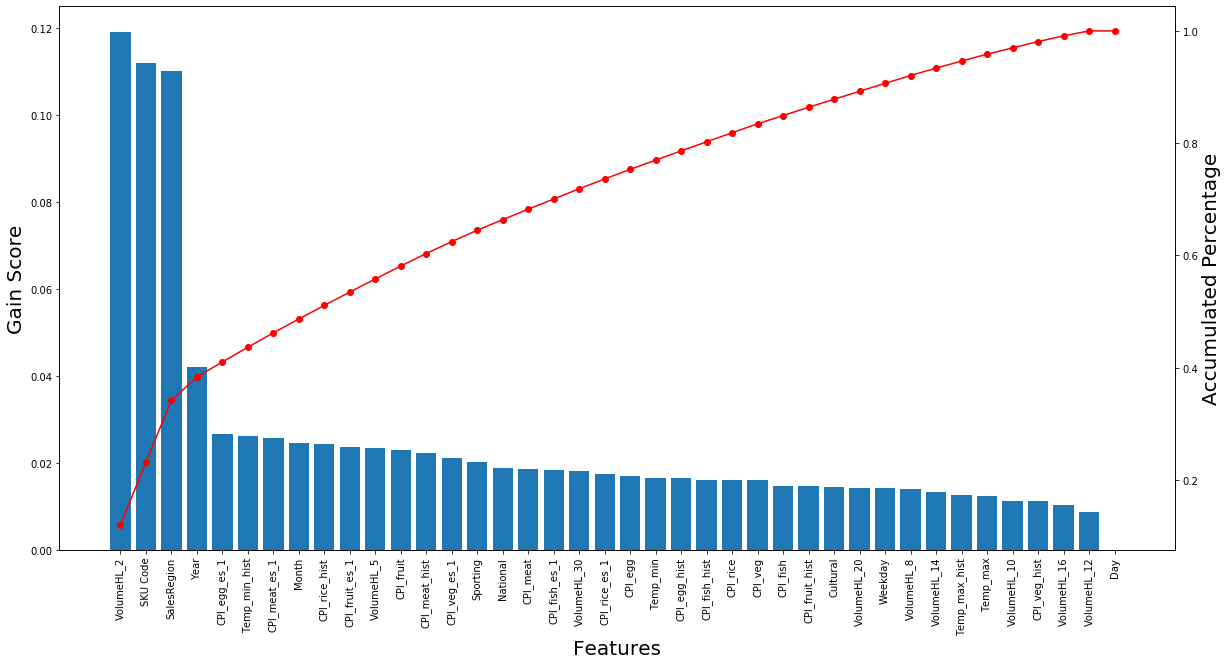

In [1029]:
featureis=model_xgb(bstr, totalsetdroped, xcols, param)

In [1031]:
colsfilter2=featureis.index[:10].to_list()
colsfilter2

['VolumeHL_2',
 'SKU Code',
 'SalesRegion',
 'Year',
 'CPI_egg_es_1',
 'Temp_min_hist',
 'CPI_meat_es_1',
 'Month',
 'CPI_rice_hist',
 'CPI_fruit_es_1']

    train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0       369.703168       4.104552     371.337769      5.382793
1       341.681793       3.387437     344.269892      5.608123
2       333.488458       2.750851     337.310394      3.946885
3       327.807648       3.758443     332.611145      3.754649
4       320.432544       3.870481     326.297217      3.297502
5       315.146594       3.804393     321.958649      2.922589
6       308.835889       2.024151     316.341876      4.421394
7       302.660278       2.206537     311.563538      3.543416
8       299.926386       2.977999     309.994464      2.139945
9       294.357837       4.223564     305.354846      5.078104
10      290.907062       1.974205     302.707757      3.762474
11      289.127484       2.128482     302.037933      3.938984
12      286.526831       1.634116     300.721490      3.450558
13      285.716565       1.760654     300.658917      3.495014
14      284.062604       1.913324     299.730860      3

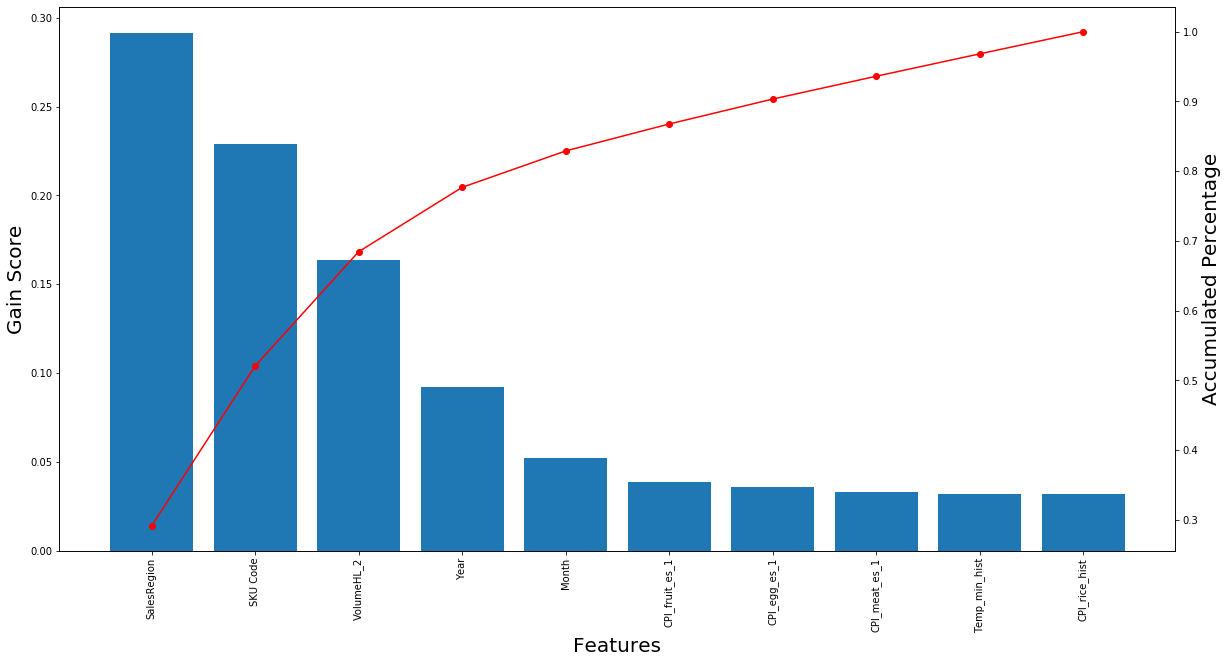

In [1032]:
featureis1=model_xgb(bstr, totalsetdroped, colsfilter2, param)